## Means Testing

#### A Note on the Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, then the distribution of the sample means will be approximately normally distributed

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
# simulate rolling a virtual die

### Distribution of sample means 
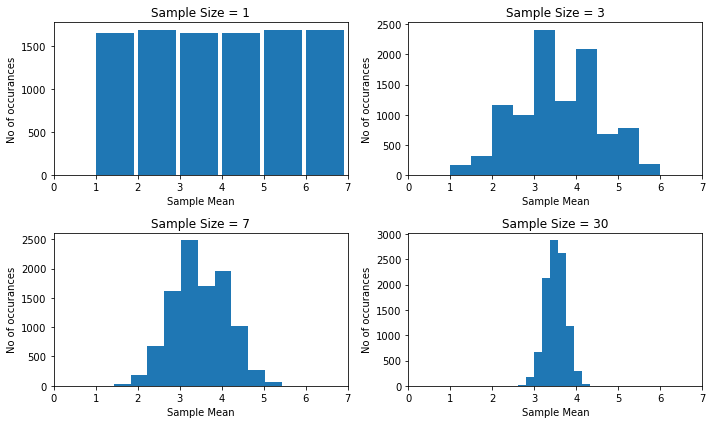

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

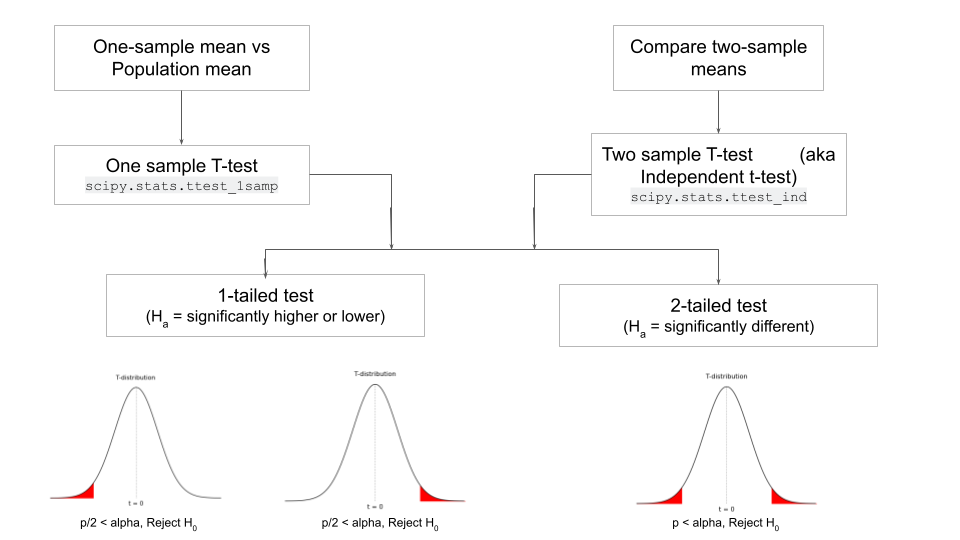

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

In [3]:
mpg = data('mpg')

In [4]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# lets do some mean testing

In [ ]:
# automatic vehicles may have different highway mileage than manual
# older cars have lower city mpg than newer cars
# the displacement of older cars is different than all cars

In [14]:
# FIRST : the displacement of older cars is different than all cars
# Lets make our hypotheses
mpg.year.value_counts()

# okay so 
# older cars = 1999
# newer cars = 2008

1999    117
2008    117
Name: year, dtype: int64

### H$_o$

#### The mean displacement of older vehicles is not different than all vehicles

### H$_a$

#### The mean diplacement of older cars is different from the mean displacement all cars

#### Determining our test:
#### 
    - we are comparing all 1999 vehicles to *ALL* vehicles:  this means we are performing a 1 sample test
    - we are comparing the means of 1999 vehicles to all vehicles by way of sheer difference so we have a two_tailed test

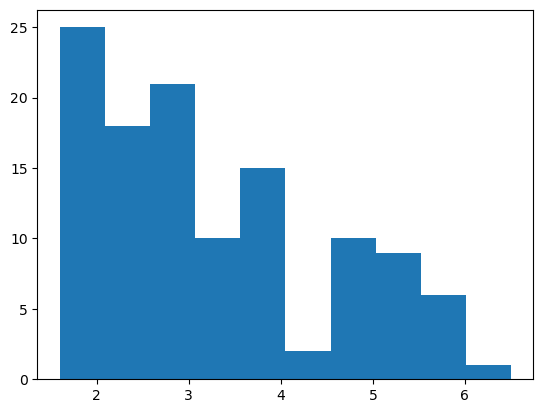

In [19]:
plt.hist(mpg[mpg.year == 1999].displ)
plt.show()

In [ ]:
# this does look significantly tailed, due to the CLT (central limit theorem) and the idea that this is likely skewd for a multitude 
# of reasons, we're going to stick with a t-test

In [21]:
# we will get the displacement mean for ALL cars
μth = mpg.displ.mean()
μth

3.4717948717948697

In [30]:
# establish the confidence level
α = .05

In [32]:
displ_old = mpg[mpg.year == 1999].displ
displ_old

1      1.8
2      1.8
5      2.8
6      2.8
8      1.8
9      1.8
12     2.8
13     2.8
16     2.8
22     5.7
24     5.7
25     5.7
31     5.7
32     6.5
33     2.4
35     3.1
38     2.4
39     3.0
40     3.3
41     3.3
45     3.8
46     3.8
51     3.9
52     3.9
56     5.2
57     5.2
58     3.9
62     5.2
64     5.9
71     5.2
72     5.2
74     5.9
75     4.6
76     5.4
78     4.0
79     4.0
80     4.0
83     5.0
84     4.2
85     4.2
86     4.6
87     4.6
89     5.4
91     3.8
92     3.8
95     4.6
96     4.6
100    1.6
101    1.6
102    1.6
103    1.6
104    1.6
109    2.4
110    2.4
113    2.5
114    2.5
116    2.0
117    2.0
125    4.0
126    4.7
131    4.0
134    4.6
135    5.4
136    5.4
138    4.0
141    5.0
142    2.4
143    2.4
148    3.0
149    3.0
151    3.3
152    3.3
155    3.1
156    3.8
157    3.8
160    2.5
161    2.5
166    2.2
167    2.2
168    2.5
169    2.5
174    2.7
175    2.7
176    3.4
177    3.4
180    2.2
181    2.2
184    3.0
185    3.0
187    2.2
188    2.2

In [24]:
# actually doing the t-test

stats.ttest_1samp(displ_old, μth)

Ttest_1sampResult(statistic=-1.6361431738775498, pvalue=0.10452008593170263)

In [ ]:
# Questions for a two_tailed, one sample t-test: 
# because its two_tailed, p < α

In [27]:
t_stat, p_val = stats.ttest_1samp(displ_old, μth)
p_val

0.10452008593170263

In [28]:
t_stat

-1.6361431738775498

In [31]:
p_val < α

False

In [ ]:
# SO! our p value is NOT less than our alpha
# what does this mean? We cannot reject the null hypothesis

### # older cars have lower city mpg than newer cars

In [ ]:
# First steps:
# 1) set up hypotheses
# set a CL and alpha
# determine if this is 1 or 2 sample
# determine if this is 1 or 2 tailed

In [ ]:
# Step 1:

# Null Hypothesis: The 1999 vics either have greater than or equal 
# mean city mpg than 2008 vics

# Alternative Hypothesis: My 1999 vics have a mean city mpg that is
# lower than the 2008 vics

In [ ]:
# Step 2:

# 1999 vics vs 2008 vics = two sample test (independant ttest)
# 1999 vics have a city mpg that is LOWER than 2008 vics = ONE TAILED

# p/2 < α
# t stat needs to be negative

In [ ]:
# check out the spread of information 

In [35]:
cty_1999 = mpg[mpg.year == 1999].cty
cty_2008 = mpg[mpg.year == 2008].cty

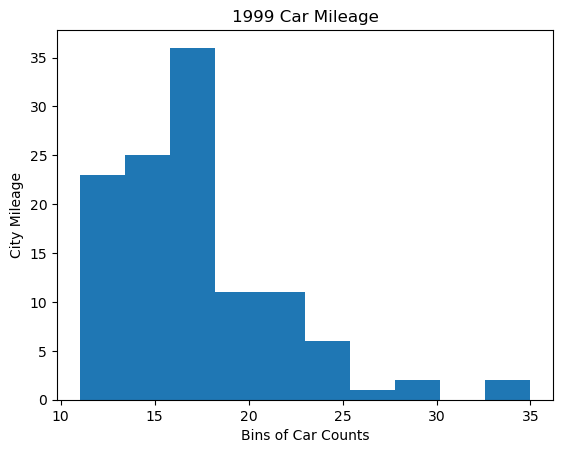

In [39]:
plt.hist(cty_1999)
plt.xlabel('Bins of Car Counts')
plt.ylabel('City Mileage')
plt.title('1999 Car Mileage')
plt.show()

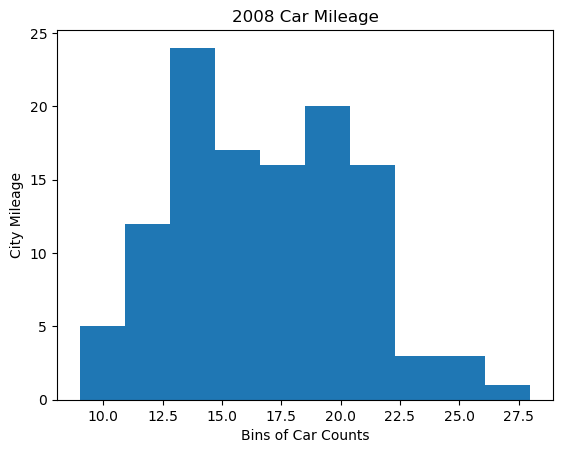

In [40]:
plt.hist(cty_2008)
plt.xlabel('Bins of Car Counts')
plt.ylabel('City Mileage')
plt.title('2008 Car Mileage')
plt.show()

In [42]:
# the test we want to use is t-test

# Lets check the other parameter variance

# H$_0$: 1999 cars have equal variance in city mileage to 2008 cars
# H$_a$: 1999 cars have different variance in city mileage than 2008 cars

In [ ]:
# sub-alpha = 0.05
# we'll run a levene test to check the variance between the two
# if p < alpha, we will reject the null and say that these groups
# have inequal variance

In [43]:
stats.levene(cty_1999, cty_2008)


LeveneResult(statistic=0.030273333475361427, pvalue=0.8620232104333374)

In [ ]:
# the p value is significantly greater than the sub-alpha, so
# I cannot reject the null hypothesis
# We can presume that these groups have equal variance in 
# 1999 and 2008 cars' city mileage


In [45]:
# be careful putting arguments into ttest.ind when you have a 
# one-tailed test, these are positional arguments
# stats.ttest_ind(argument_1 < argument_2)

t_stat, p_val = stats.ttest_ind(cty_1999, 
                                cty_2008, 
                                equal_var=True)

In [46]:
t_stat

# 

0.5674988409997608

In [47]:
p_val

0.5709240495406107

In [48]:
(p_val / 2) < α

False

In [ ]:
# once again we cannot reject the null hypothesis because 
# p / 2 != < α
# AND because the t stat is not less than 0

### automatic vehicles may have different highway mileage than manual


In [ ]:
# Groups for testing:
# auto
# manual
# SO two sample test
# we are wanting to know if the hwy mileage fort hese two samples
# are different so we are doing a two-tailed test


In [ ]:
# Lets set up our hypotheses
# Null Hypothesis: The highway mmielage of automatic and manual 

In [ ]:
# parameter check to see if we can conduct a ttest_ind:
# normality, variance, and independence? 

In [ ]:
# Either a car is manual or auto, cannot be both so we can say that
# they are indeed independent



In [50]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [52]:
# now we can make a column that will sparse out auto and manual 


mpg['automatic'] = mpg.trans.str.startswith('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False


In [53]:
auto_hwy = mpg[mpg.automatic == True].hwy

In [54]:
manual_hwy = mpg[mpg.automatic != True].hwy

In [55]:
auto_hwy

1      29
4      30
5      26
7      27
9      25
11     27
12     25
14     25
16     24
17     25
18     23
19     20
20     15
21     20
22     17
23     17
25     23
27     25
29     19
30     14
31     15
32     17
33     27
34     30
35     26
36     29
37     26
38     24
39     24
40     22
41     22
42     24
43     24
44     17
45     22
46     21
47     23
48     23
50     18
51     17
53     19
54     19
55     12
57     15
58     17
59     17
60     12
61     17
62     16
63     18
64     15
66     12
67     17
68     17
71     15
73     17
74     15
75     17
76     17
77     18
78     17
80     17
81     19
82     19
83     17
84     17
87     16
88     17
89     15
90     17
92     25
94     24
95     21
98     22
101    32
104    32
106    36
107    36
109    26
111    30
113    26
115    28
116    26
119    27
120    24
123    22
124    19
125    20
126    17
127    12
128    19
129    18
130    14
131    15
132    18
133    18
134    15
135    17
136    16
137    18


In [56]:
manual_hwy

2      29
3      31
6      26
8      26
10     28
13     25
15     25
24     26
26     26
28     24
49     19
52     17
56     17
65     16
69     16
70     12
72     16
79     19
85     17
86     16
91     26
93     26
96     22
97     23
99     20
100    33
102    32
103    29
105    34
108    29
110    27
112    31
114    26
117    29
118    28
121    24
122    24
142    29
145    32
146    27
149    25
152    17
160    25
162    27
163    25
167    26
168    26
172    25
173    27
174    20
177    17
180    29
182    31
185    26
188    29
189    31
192    26
196    35
197    37
201    20
203    22
204    17
206    18
208    29
210    29
212    24
213    44
214    29
217    29
219    29
221    24
222    44
224    29
226    28
228    29
231    29
233    26
Name: hwy, dtype: int64

In [ ]:
# Now thats formally state our hypotheses

# Null Hypothesis: There is no difference in the mean hwy
# mileage in automatic and manual cars

# Alternative Hypothesis: There is a difference in the mean hwy
# mileage in automatic and manual cars

In [ ]:
# Independence check: passed
# Varience check: lets do it!

In [59]:
stat, p_levene = stats.levene(auto_hwy, manual_hwy)

In [60]:
# Varience Hypothesis:
# H0: varience is equal
# HA: variance is inequal

α = 0.05
p_levene < α

False

In [ ]:
# because the p from the levene test is not less than alpha,
# we cannot reject the null hypothesis

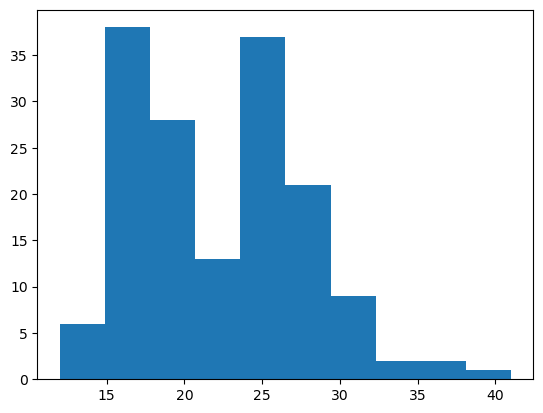

In [64]:
plt.hist(auto_hwy)

plt.show()

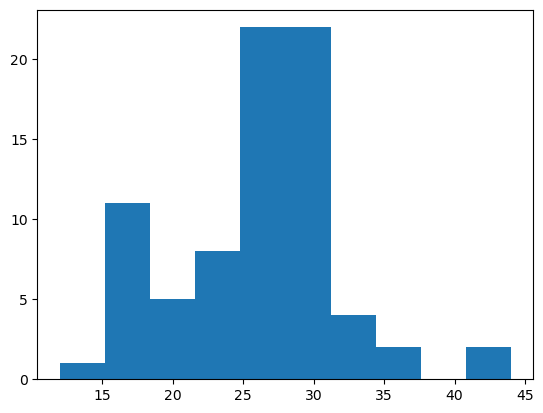

In [65]:
plt.hist(manual_hwy)

plt.show()


In [ ]:
# variance check: variance is equal
# Independece check: passed

In [66]:
t_stat, p_val = stats.ttest_ind(manual_hwy, 
                               auto_hwy, 
                               equal_var=True)

In [67]:
t_stat

4.368349972819688

In [68]:
p_val

1.888044765552951e-05

In [69]:
p_val < α

True

In [ ]:
# Our p value is less than alpha, which means we can reject our
# Null Hypothesis, which suggests that there is some measurable
# difference in the average highway mileage in automatic
# versus manual cars

In [71]:
# now lets do a single tailed test with the same setup


# H0: Highway mileage on average in manual cars is less than 
# or equal to automatic cars

# HA: Highway mileage on average in manual cars is greater than 
# automatic cars

In [72]:
# Setup for one_tail:

t_stat, p_val = stats.ttest_ind(manual_hwy, 
                                auto_hwy, 
                                equal_var=True)

In [73]:
((p_val / 2) < α) and (t_stat > 0)

True

In [ ]:
# For a two sample, one-tailed test, with this specfic order of 
# comparison, I need both the p_val / 2 to be less than alpha
# and the t_stat to be positive in order to reject the null

In [ ]:
# So we can go with our alternative hypothesis which is

# HA: Highway mileage on average in manual cars is greater than 
# automatic cars

In [75]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True


In [85]:
automatic_mean = mpg[mpg.trans.str.startswith('auto')].hwy.mean()

In [84]:
manual_mean = mpg[mpg.trans.str.startswith('manual')].hwy.mean()

In [86]:
manual_mean > automatic_mean

True